In [2]:
import os

In [3]:
%pwd

'c:\\Users\\HP\\Desktop\\apex\\project\\Predicting_Bitcoin_Prices_Using_ANN\\research'

In [4]:
os.chdir("../")

In [5]:
%pwd

'c:\\Users\\HP\\Desktop\\apex\\project\\Predicting_Bitcoin_Prices_Using_ANN'

In [6]:
import tensorflow as tf

In [7]:
model = tf.keras.models.load_model("artifacts/model/trained_model.h5")

In [8]:
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class EvaluationConfig:
    path_of_model: Path                 # Path to the trained .h5 model
    training_data: Path                 # Path to train_val_data.pkl
    all_params: dict                    # All hyperparameters
    params_learning_rate: float
    # mlflow_uri: str                     # URI for MLflow tracking
    params_epochs: int                 # Number of epochs used
    params_batch_size: int             # Batch size

In [9]:
from ANNClassifier.constants import *
from ANNClassifier.utils.common import read_yaml, create_directories, save_json

In [ ]:
class ConfigurationManager:
    def __init__(
        self, 
        config_filepath=CONFIG_FILE_PATH,
        params_filepath=PARAMS_FILE_PATH
    ):
        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        create_directories([self.config.artifacts_root])
    
    def get_evaluation_config(self) -> EvaluationConfig:
        training = self.config.training  # accessing the training block

        eval_config = EvaluationConfig(
            path_of_model=Path(training.trained_model_path),
            training_data=Path(training.data_file),
            # mlflow_uri="",  # empty or remove if MLflow not used
            all_params=training,  # or self.config if you want to log everything
            params_epochs=training.epochs_final,        # ✅ pulled from training block
            params_batch_size=training.batch_size,      # ✅ pulled from training block
            params_learning_rate=0.001                  # set manually if not present
        )
        return eval_config


In [11]:
import tensorflow as tf
from pathlib import Path
# import mlflow
# import mlflow.keras
from urllib.parse import urlparse

In [12]:
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
class Evaluation:
    def __init__(self, config: EvaluationConfig):
        self.config = config

    def load_model(self):
        self.model = tf.keras.models.load_model(self.config.path_of_model)

    def load_data(self):
        with open(self.config.training_data, "rb") as f:
            data = pickle.load(f)
        self.X_val = data["X_val"]
        self.y_val = data["y_val"]

    def evaluate(self):
        self.y_pred = self.model.predict(self.X_val)
        self.mse = mean_squared_error(self.y_val, self.y_pred)
        self.mae = mean_absolute_error(self.y_val, self.y_pred)
        self.r2 = r2_score(self.y_val, self.y_pred)

        # Plot actual vs predicted
        import matplotlib.pyplot as plt

        plt.figure(figsize=(12, 6))
        plt.plot(self.y_val, label="Actual")
        plt.plot(self.y_pred, label="Predicted")
        plt.title("Model Prediction vs Actual")
        plt.xlabel("Time Steps")
        plt.ylabel("Bitcoin Price")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


    def save_score(self):
        scores = {
            "mean_squared_error": self.mse,
            "mean_absolute_error": self.mae,
            "r2_score": self.r2
        }
        save_json(path=Path("artifacts/scores.json"), data=scores)

    def run(self):
        self.load_model()
        self.load_data()
        self.evaluate()
        self.save_score()

47/47 [==============================] - 0s 809us/step


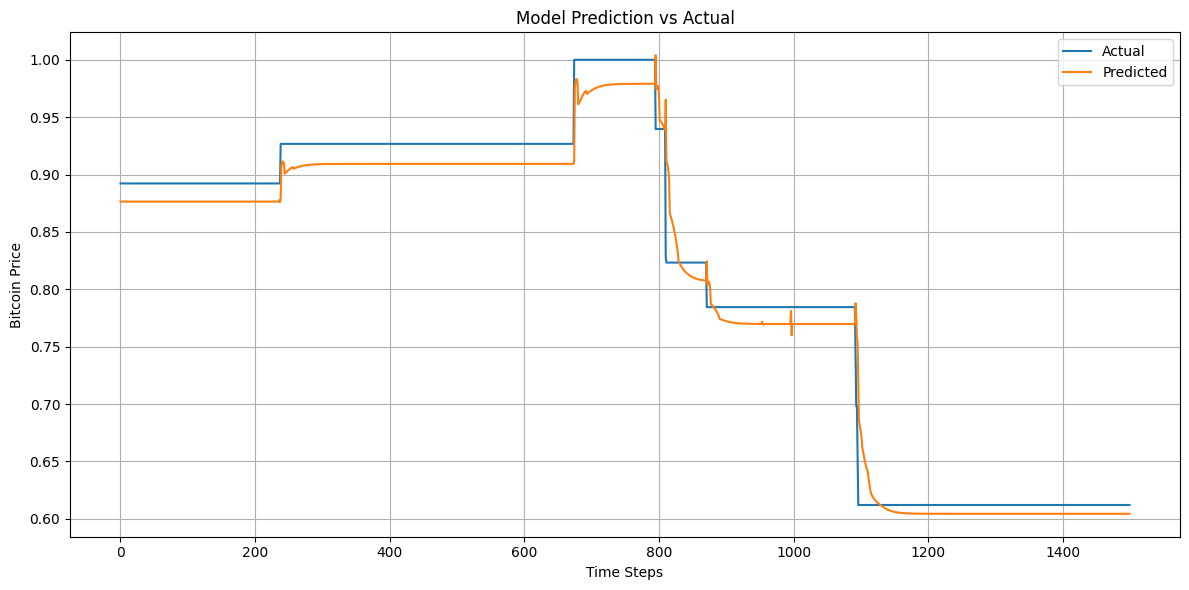

✅ Evaluation complete. Scores saved to scores.json


In [15]:
try:
    config = ConfigurationManager()
    eval_config = config.get_evaluation_config()
    evaluation = Evaluation(config=eval_config)
    evaluation.run()
    print("✅ Evaluation complete. Scores saved to scores.json")
except Exception as e:
    raise e

47/47 [==============================] - 0s 670us/step


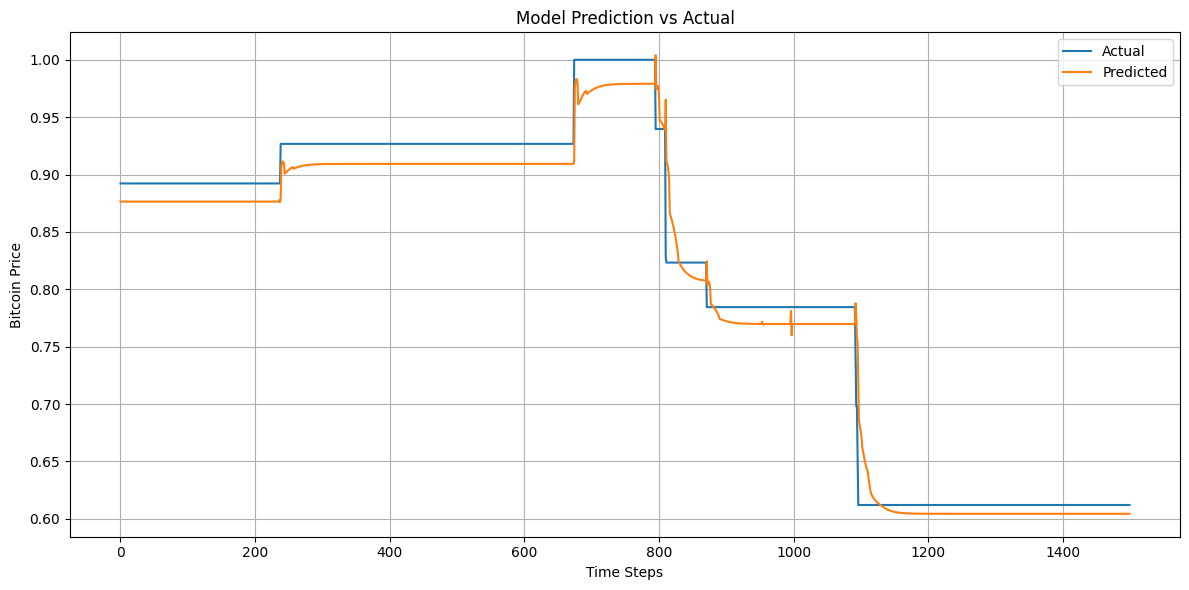

✅ Evaluation complete. Scores saved to scores.json


In [16]:
try:
    config = ConfigurationManager()
    eval_config = config.get_evaluation_config()
    evaluation = Evaluation(config=eval_config)
    evaluation.run()
    print("✅ Evaluation complete. Scores saved to scores.json")
except Exception as e:
    raise e

47/47 [==============================] - 0s 1ms/step


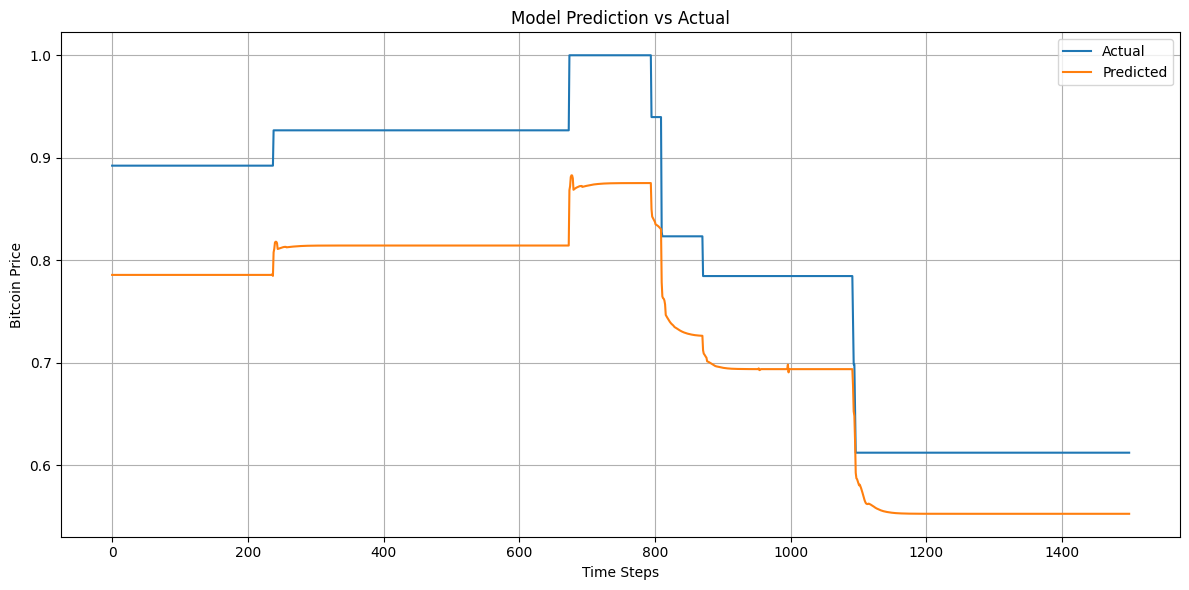

✅ Evaluation complete. Scores saved to scores.json


In [14]:
try:
    config = ConfigurationManager()
    eval_config = config.get_evaluation_config()
    evaluation = Evaluation(config=eval_config)
    evaluation.run()
    print("✅ Evaluation complete. Scores saved to scores.json")
except Exception as e:
    raise e